# Introduction

Nama : Wahyudi

Dataset : Telco Customer Churn

Objective: Create a model that can be used to predict whether customers churn or not.


# Import Library

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import wahyu_lib
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report

# Data Loading

In [3]:
# data loading
data=pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Interesting!. Almost all columns contain object Dtype except `MonthlyCharges`, `SeniorCitizen`, `tenure`. This means that the data in this dataset is dominated by categorical data. We will later this categorical data so that the data can be recognized by the model that we will create.


I found 1 oddity with the Total Charge feature. Total charge should be a feature of type int or float, but above we found that this feature is of type data object. It is possible that there is data inserted which is a string so that all the data is read as a data object.

In [5]:
#cek data yang berisi space ' '
data[data.TotalCharges.str.isspace()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After checking, it turns out that there is data in the form of `space` ' '. Apart from that, it was also found that all `total charge` data containing space were for customers who had `0` tenure. To make sure again, I also need to check whether all customers who have tenure `0` are customers whose `total charge` is a space

In [6]:
#show data where the tenure value is 0
data[data.tenure==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After checking, it turns out that it is true that the customer who has a `total charge` in the form of a space is because the customer is a customer who has tenure = `0`. Because of this, I replaced the space value in the `total charge` feature with the assumption that customers who have tenure `0` are not charged **charge**

In [7]:
#Replace the space value with the value 0 and convert the data into numeric Dtype.
data.TotalCharges.replace(' ', 0, inplace=True)
data.TotalCharges=pd.to_numeric(data.TotalCharges)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


There is something strange about the `senior citizen` column because it has a 75% quantile value of 0 and a max value of `1`. I suspect that the `senior citizen` column is categorical data which contains data in the form of numbers. To see this I need to look at the unique data in the `seniorcitizen` column.

In [9]:
data.SeniorCitizen.unique()

array([0, 1])

The data only contains 2 categories, namely 0 and 1. I assume that 1 means a senior Netizen customer, while 0 means not a senior citizen. Data like this is categorical data.

# Exploratory Data Analys

So that none of the original data changes, I first copy the data that will be used for the EDA process.

In [10]:
#copy data to data_eda
data_eda=data.copy()

## Target

Target is the data field that is the goal of the model that will be created. The target for this data is the churn field because the model is expected to be able to determine whether the data is churn or not.

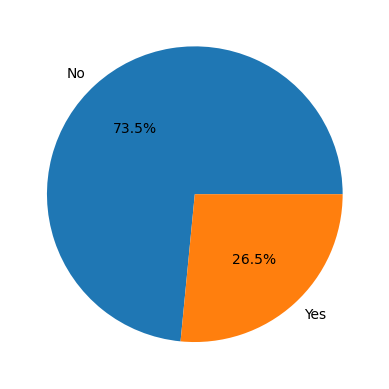

In [11]:
# show the composition of target data
plt.pie(data_eda.Churn.value_counts(), labels=data_eda.Churn.unique(), autopct='%1.1f%%');

The target of the data set is the churn column. This dataset is imbalance data because the data has a target ratio that is not the same, with a ratio of almost 1:3.

The company only has about 73,5% truly loyal customers. Meanwhile, the remaining 26.5 are churn customers. The figure of 23.5 percent cannot be a measure of the company's condition, because each company industry has its own standards. But of course reducing the percentage of customers who churn is good progress. By predicting more quickly whether a customer is likely to churn, the hope is to reduce the percentage of customers who churn

## Distribution of feature numeric data

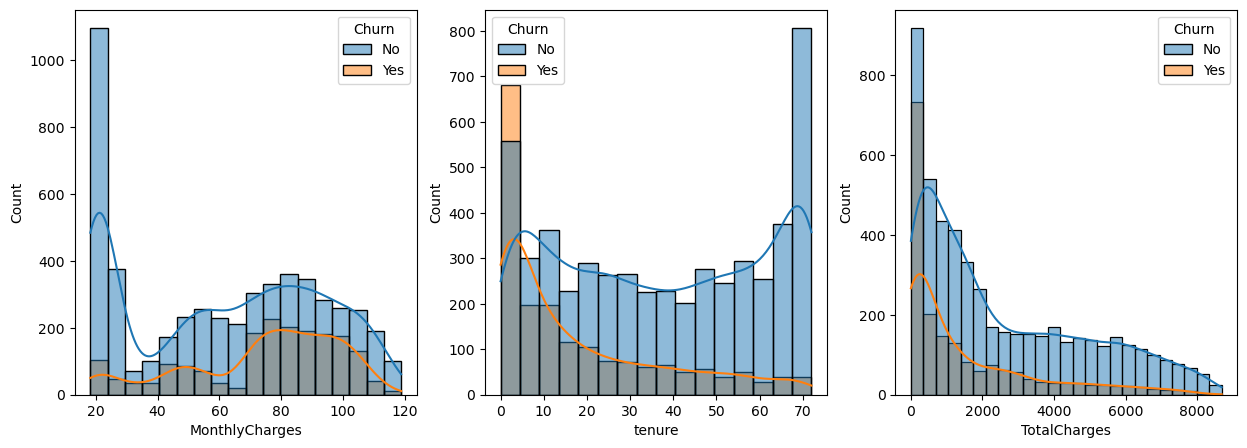

In [12]:
# Show distribution of numerical data
wahyu_lib.histplot_1d(data=data_eda, list=['MonthlyCharges', 'tenure', 'TotalCharges'], hue='Churn')

The distribution of consumer data that churns and does not churn in the total charge feature is very identical. Meanwhile, in the monthly charges feature, consumers who do not churn are mostly consumers whose monthly charges are small, but for medium and large monthly charges, the ratio of consumers to churn is the same. Tenure is the feature that has the clearest difference in data distribution between churn consumers and not churm customer. The longer the tenure value, the smaller the ratio of consumers who churn compared to consumers who do not churn, and vice versa.

## Correlation between Numerical Features

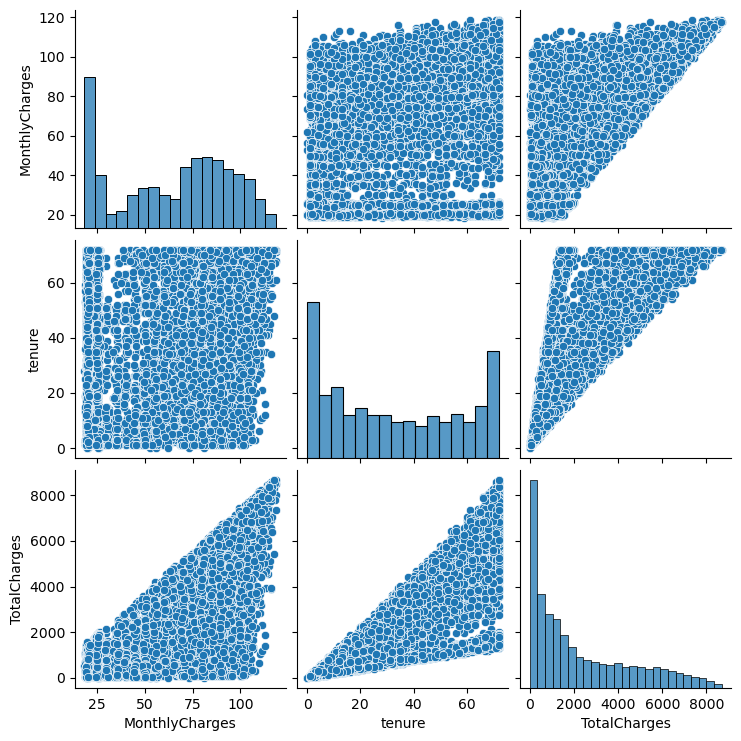

In [13]:
#show data relationships in swarnplot form
sns.pairplot(data=data_eda, vars=['MonthlyCharges', 'tenure', 'TotalCharges'])

In [14]:
#show correlation scores between numeric features
data_eda[['MonthlyCharges', 'tenure', 'TotalCharges']].corr()

,MonthlyCharges,tenure,TotalCharges
MonthlyCharges,1.000000,0.247900,0.651174
tenure,0.247900,1.000000,0.826178
TotalCharges,0.651174,0.826178,1.000000


If we look at the graph above, it is very clear that there is a very close relationship between `tenure` and `total charge`. The longer the tenure a consumer gets, the greater the total charge the consumer gets. Apart from that, `monthly charges` also has a strong relationship with `total charges`s. What is **interesting** from the plot above is that `total charges` has a **stronger** correlation value with `tenure` compared to `monthly charges`. In fact, if we use simple logic, `monthly charges` should have a stronger relationship with `total charges` because in general `total charges` is a collection of `monthly charges`. I concluded that there might be other **charges** besides `monthly charges` so the correlation between the two features is not as strong as I thought.

## Exploring Categorical Features

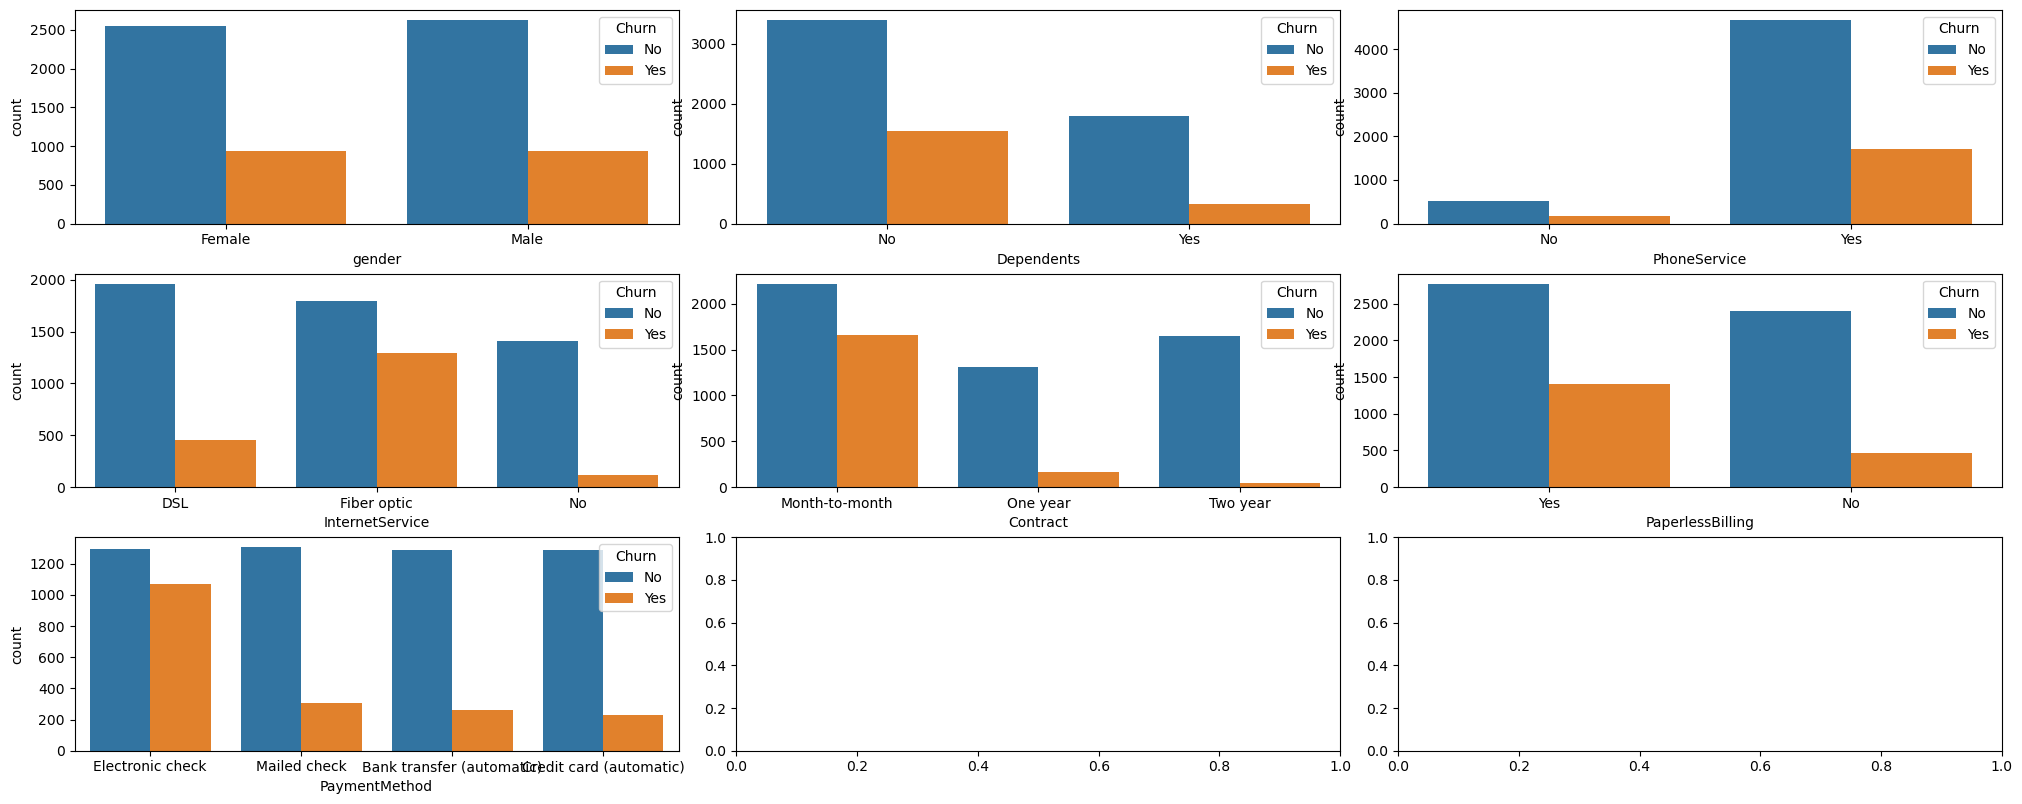

In [15]:
#show the amount of data in each feature category based on the target
wahyu_lib.show_count(
    data=data_eda, 
    list=['gender', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling','PaymentMethod'],
    hue='Churn',
    figsize=[20,8]
    )

Based on the plot above, there are several differences in the ratio between consumers who churn and consumers who do not churn on several features, including `internet service` `payment method`, `internet service`, `contract`. In internet service, the customer churn ratio for consumers using fiber optic is greater than for others.

Another insight obtained is that the longer the contract made with consumers, the smaller the customer churn ratio. This makes perfect sense because if we are successful in entering into a long-term contract, it will be very unlikely that we will need to renew the contract. So there is less chance of churn. In the `payment method`, electronic check also increases the ratio of consumers to churn. It's a good idea for companies to encourage consumers to make payments via 'mailed heck', 'bank transfer (automatic), credit card (automatic)'. Payment methods that have automatic features make it easier for customers to make payments so that customers are more comfortable while they are consumers.

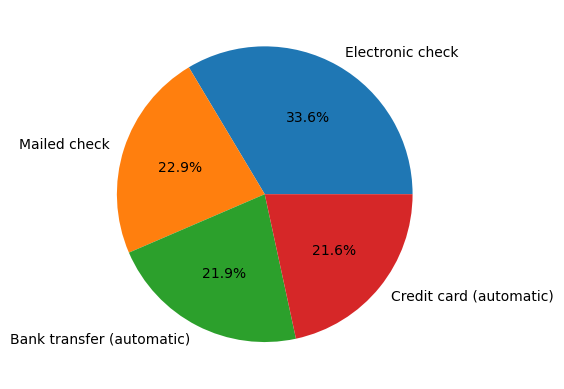

In [16]:
#menampilkan presentase jenis pembayaran yang digunakan pelanggan
plt.pie(data_eda.PaymentMethod.value_counts(), labels=data_eda.PaymentMethod.unique(), autopct='%1.1f%%');

Apart from directing consumers to make payments via payment methods that have automatic payment features. The marketing team also needs to look for new consumers who already have a payment mode with an automatic payment feature. This needs to be done because as we can see in the **graph above**, the electronic check payment mode is still the most common payment method used by customers. By looking for consumers who already have a payment mode with an automatic payments feature, it is hoped that fewer customers will churn.

<Axes: xlabel='PaymentMethod', ylabel='count'>

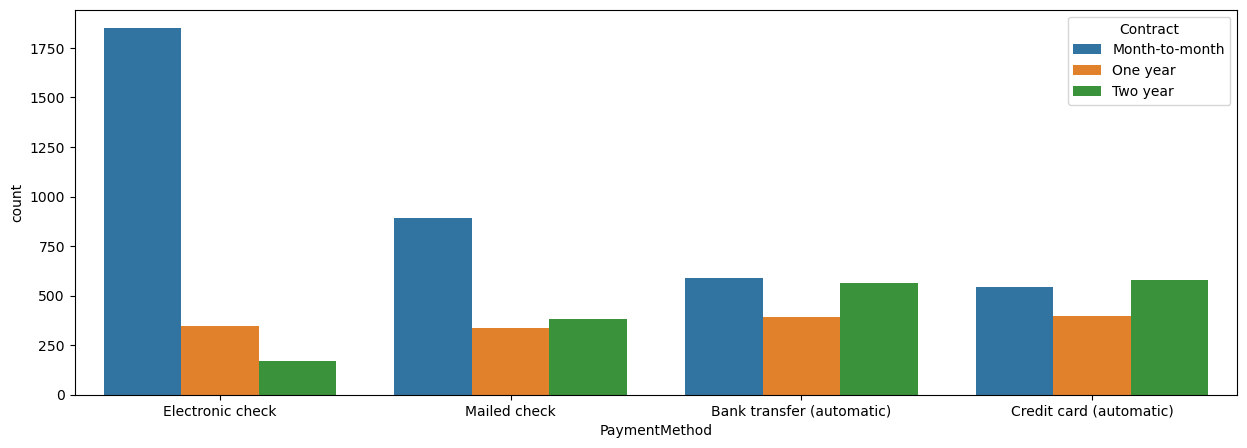

In [17]:
fig, ax=plt.subplots(figsize=[15,5])
sns.countplot(data=data_eda, x='PaymentMethod', hue='Contract', ax=ax)

The graph above shows that customers who make payments using payment modes without the automatic payments feature tend to choose month to month contracts. A month to month contract will reduce the possibility of customer churn. Marketing can use this information to create promotions. I suggest that promotions be emphasized towards users who make automatic payments and long-term contacts. Getting quality consumers (consumers who don't churn) will help the company to gain greater profits because getting new consumers is more expensive than retaining old customers.

# Data preprocessing

## Get Inference

This process is a process to set aside some data as inference data. I decide to take 20 rows data to be inference data

In [18]:
#separating into 2 data, namely inference data and train data
data_inf = data.sample(20, random_state=0)
data_train= data.drop(data_inf.index)

Before doing any other data preprocessing, I decided to drop the `CustomerID` feature because there is no connection between ID and `Churn`. This is because each row will have its own unique value.

In [19]:
#delete column customerID
list_drop=['customerID']
data_train.drop(columns=list_drop, inplace=True)

Apart from that, there is something interesting about the `multiple lines` feature. There is 1 unique value that I think is interesting, namely, `No phone service`, as well as several other features that have the value `No internet service`

In [20]:
# displays the column and its unique value
for i in data_train.columns:
    if data_train[i].dtypes=="object":
        print(f'{i}: {data_train[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


I assume that `no multiple service` is a category that explains that `multiple lines` has a value of `no` because telephone service has a value of `no`. I will change the value of `No phone service` in the multiple lines feature to `no` because `no phone service` describes data that actually already exists in the multiple lines feature. We can also find this pattern in features related to internet services (`OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies`), I will do the same thing with these features.

In [21]:
#replace data
data_train.MultipleLines.replace('No phone service', 'No', inplace=True)
data_train.OnlineSecurity.replace('No internet service', 'No', inplace=True)
data_train.OnlineBackup.replace('No internet service', 'No', inplace=True)
data_train.DeviceProtection.replace('No internet service', 'No', inplace=True)
data_train.TechSupport.replace('No internet service', 'No', inplace=True)
data_train.StreamingTV.replace('No internet service', 'No', inplace=True)
data_train.StreamingMovies.replace('No internet service', 'No', inplace=True)

In [22]:
#replace data
data_inf.MultipleLines.replace('No phone service', 'No', inplace=True)
data_inf.OnlineSecurity.replace('No internet service', 'No', inplace=True)
data_inf.OnlineBackup.replace('No internet service', 'No', inplace=True)
data_inf.DeviceProtection.replace('No internet service', 'No', inplace=True)
data_inf.TechSupport.replace('No internet service', 'No', inplace=True)
data_inf.StreamingTV.replace('No internet service', 'No', inplace=True)
data_inf.StreamingMovies.replace('No internet service', 'No', inplace=True)

## Data Split

Data split is the process of dividing train data into 3 pieces of data, namely train data, validation data and test data. Train data and validation data are data used to train the model, while test data is data that will later be used to evaluate the model.

In [23]:
#split data
X_train, y_train, X_val, y_val, X_test, y_test=wahyu_lib.split_data(data_train, 'Churn', 0.15, 0.15)

## Handling Outliers

There are only 2 numerical data, namely tenure and monthly charges. In handling outliers, I have prepared the function in `wahyu_lib`. This function will cap the data contained in the `list` parameter. Each column will be capped according to the data distribution in each column.

In [24]:
# winsorizing data
X_train=wahyu_lib.handling_outliers(data=X_train, list=['MonthlyCharges', 'tenure'])

kolom gausian    :  MonthlyCharges, tenure
kolom Skew       :  


## Handling Missing Value

**Cek null value**

In [25]:
# Check the number of rows of data that are null
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

>Tidak ditemukan adanya null value.

Apart from checking null values, we also need to check unique values ​​in each categorical column.

In [26]:
# menampilkan kolom dan unique valuenya
for i in X_train.columns:
    if X_train[i].dtypes=="object":
        print(f'{i}: {X_train[i].unique()}')

gender: ['Male' 'Female']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['No' 'DSL' 'Fiber optic']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Apart from categorical data, we also need to check the numerical data by looking at the description of the numerical data.

In [27]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5073.000000,5073.000000,5073.000000,5073.000000
mean,0.164203,32.019515,64.685107,2250.548433
std,0.370496,24.483413,30.205075,2256.750075
min,0.000000,0.000000,18.700000,0.000000
25%,0.000000,8.000000,35.050000,377.850000
50%,0.000000,28.000000,70.550000,1359.000000
75%,0.000000,55.000000,90.000000,3720.350000
max,1.000000,72.000000,118.650000,8684.800000


If you look at the data above, there is nothing to suspect of missing values ​​in the numerical data because nothing is too small or too large. It's just that because senior netizen data contains numbers, senior netizens are included in the data above.

## Scaling & Encoding 

Scaling is done on numeric data while encoding is done on categorical data. To make it easier for us to do scaling and encosing, we need to create a list of numerical features and categorical features.

In [28]:
# separate numeric and categorical data
num_list, cat_list=wahyu_lib.pisah_num_cat(X_train)

feature numerik   :  SeniorCitizen, tenure, MonthlyCharges, TotalCharges
feature kategorik :  gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod


As stated previously. The SeniorCitizen feature is categorical data but as if it has been encoded, the feature will not be scaled or encoded.

In [29]:
# delete senior netizen scores from the numeric list
num_list.remove('SeniorCitizen')
pass_list=['SeniorCitizen']

The encoding and scaling processes are carried out on train data, validation and test data. Even though it is done on all three features, the fit is only done on the train data.

In [30]:
# membuat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_list),
        ("cat", OrdinalEncoder(), cat_list),
        ("pass", 'passthrough', pass_list),
    ]
)
# melakukan encoding dan scaling
X_train_final=preprocessor.fit_transform(X_train)
X_test_final=preprocessor.transform(X_test)
X_val_final=preprocessor.transform(X_val)

# membuat data frame data yang telah di preprocessing
df_X_train_final=pd.DataFrame(data=X_train_final, columns=num_list+cat_list+pass_list)
df_X_val_final=pd.DataFrame(data=X_val_final, columns=num_list+cat_list+pass_list)
df_X_test_final=pd.DataFrame(data=X_test_final, columns=num_list+cat_list+pass_list)

Apart from encoding the feature data, the target data also needs to be labeled encoded.

In [31]:
#encoding data target
target_encoder=LabelEncoder()
y_train_final=target_encoder.fit_transform(y_train)
y_val_final=target_encoder.transform(y_val)
y_test_final=target_encoder.transform(y_test)

/Users/wahyudiwahyudi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wahyudiwahyudi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/wahyudiwahyudi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Feature Selection

The selection feature used is by using the feature_importance attribute in `random forest`.

In [32]:
#Training data with rando forest
X_train_final=preprocessor.fit_transform(X_train)
ranfor=RandomForestClassifier().fit(df_X_train_final, y_train_final)

In [33]:
#show the feature importance value
fitur_importance=pd.Series(data=ranfor.feature_importances_, index=num_list+cat_list+pass_list) 
fitur_importance.sort_values(ascending=False)

MonthlyCharges      0.195554
TotalCharges        0.190060
tenure              0.164666
Contract            0.084606
PaymentMethod       0.052673
InternetService     0.040634
PaperlessBilling    0.028497
gender              0.027729
Partner             0.023161
TechSupport         0.022434
OnlineSecurity      0.022110
SeniorCitizen       0.021943
Dependents          0.020891
OnlineBackup        0.020863
MultipleLines       0.020396
DeviceProtection    0.019411
StreamingMovies     0.018984
StreamingTV         0.017918
PhoneService        0.007472
dtype: float64

The features I chose are features that have a value above 0.03. Namely `Monthly Charges`, `Total Charges`, `Tenure`, `Contract`, `PaymentsMethond`, and `Internet Service`. However, because Total Charge and tenure have a very strong correlation, I only chose one of the two. I decided to choose `total charge` considering `total charge` has a greater **feature importance** value

In [34]:
# fitur yangdipilih
feature_selected=['MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod','InternetService', 'PaperlessBilling', 'TechSupport']

In [35]:
# update the encoding preprocessor and re-scaling with the selected features
preprocessor_final = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ['MonthlyCharges', 'TotalCharges']),
        ("cat", OrdinalEncoder(), ['Contract', 'PaymentMethod','InternetService', 'PaperlessBilling', 'TechSupport'])
    ]
)

X_train_final=preprocessor_final.fit_transform(X_train)
X_val_final=preprocessor_final.transform(X_val)
X_test_final=preprocessor_final.transform(X_test)

## Input Pipline

Pipeline input is used to help computing performance to be more efficient.

In [36]:
#input pipeline data train
X_train_batch=tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final))
X_train_batch=X_train_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [37]:
#input pipeline data validation
X_val_batch=tf.data.Dataset.from_tensor_slices((X_val_final, y_val_final))
X_val_batch=X_val_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [38]:
#input pipeline data test
X_test_batch=tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final))
X_test_batch=X_test_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

# Model Definition

The models used are sequential ANN and Functional ANN models

## ANN Sequential

In [39]:
baccuracy=tf.keras.metrics.BinaryAccuracy(threshold=0.55)
model_seq=tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7,input_shape=(len(feature_selected),),activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_seq.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.legacy.Adam(),
             metrics=[baccuracy])


## Model Functional

In [40]:
input_tensor=tf.keras.layers.Input(shape=(len(feature_selected),))
A1=tf.keras.layers.BatchNormalization()(input_tensor)
A2=tf.keras.layers.Dense(128)(A1)
A3=tf.keras.layers.Activation('relu')(A2)
B1=tf.keras.layers.BatchNormalization()(input_tensor)
B2=tf.keras.layers.Dense(64)(B1)
B3=tf.keras.layers.Activation('elu')(B2)
C=tf.keras.layers.Concatenate(axis=1)([A3, B3, input_tensor])
output_tensor=tf.keras.layers.Dense(1,activation="sigmoid")(C)
model_func=tf.keras.models.Model(inputs= input_tensor,
                      outputs=output_tensor)

model_func.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.legacy.Nadam(learning_rate=0.01),
             metrics=baccuracy)


# Model Training

## Training model Sequential

In [41]:
history=model_seq.fit(X_train_batch,
        epochs=100,
        validation_data=X_val_batch,
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

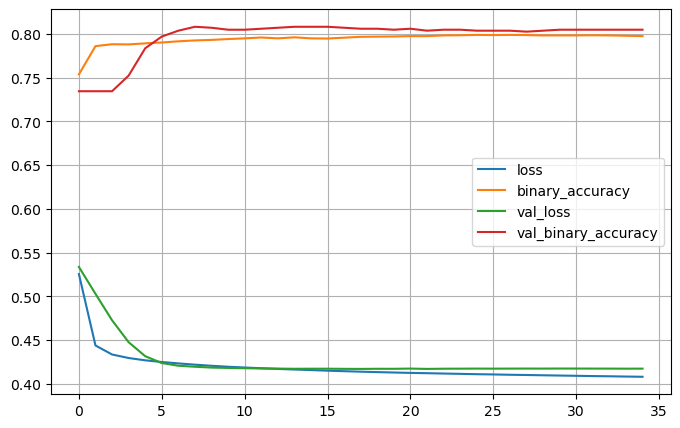

In [42]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

The training process does not reach the end of the eppoch because in model fit we have initialized a call back in the form of early stopping which prevents model vanishes from occurring for a long time. The model will stop when the model declines 10 times or when the model cannot exceed the last highest value before the model declines. What the callback monitors in this case is accuracy.

At the end of the graph we can see that the orange and green lines start to vanish and stop before the vanish drags on. Even though this model is a goodfit model when viewed from the graph, further evaluation still needs to be carried out using testing data. At the end of the graph we can see that the orange and green lines start to vanish and stop before the vanish drags on. Even though this model is a good fit model when viewed from the graph, further evaluation still needs to be carried out using testing data.

In [43]:
model_seq.save("churn")

INFO:tensorflow:Assets written to: churn/assets


INFO:tensorflow:Assets written to: churn/assets


In [44]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 7)                 56        
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 128)               1024      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                        

The layers in the model consist of 3 dense layers and 3 batch normalization layers. Batch normalization aims to carry out normalization first before the input enters the next layer. In this way we can avoid the exploding gradient problem. For more details, please see the graph below to see the contents of the sequential model.

In [45]:
tf.keras.utils.plot_model(model_seq)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training Model Functional

In [46]:
history_func=model_func.fit(X_train_batch,
        epochs=100,
        validation_data=X_val_batch,
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

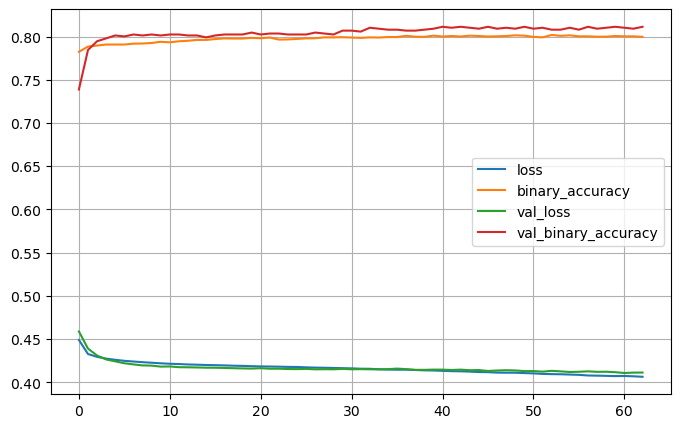

In [47]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

The training carried out on the functional model is shorter because the number of iterations is less. The model stops at epoch 54 because the same as the squential model, the functional model is also given a callback initiation in the form of early stopping. The graph above shows that the model did not experience vanishing and did not experience exploding.

In [48]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 batch_normalization_3 (Bat  (None, 7)                    28        ['input_1[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_4 (Bat  (None, 7)                    28        ['input_1[0][0]']             
 chNormalization)                                                                                 
                                                                                              

The Functional Model consists of several layers starting from the input layer. then from the input layer, the model enters 2 batch normalization models so that the model does not experience the exploding gradient problem. Each of the normalization batches then goes to the dense screen. Each dense layer has its own activation function. Then the results from the two layers are combined together with the initial input to enter the last layer before the output layer. For more details, please see the graph below.

In [49]:
tf.keras.utils.plot_model(model_func)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Model Evaluation

## Model Sequential

In [50]:
y_train_pred=model_seq.predict(X_train_batch)
y_test_pred=model_seq.predict(X_test_batch)
y_train_pred=np.where(y_train_pred>0.55,1,0)
y_test_pred=np.where(y_test_pred>0.55,1,0)

17/17 [==============================] - 0s 634us/step


In [51]:
print(classification_report(y_train_final, y_train_pred))
print(classification_report(y_test_final, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3726
           1       0.69      0.46      0.55      1347

    accuracy                           0.80      5073
   macro avg       0.76      0.69      0.71      5073
weighted avg       0.79      0.80      0.79      5073

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       773
           1       0.67      0.41      0.51       281

    accuracy                           0.79      1054
   macro avg       0.74      0.67      0.69      1054
weighted avg       0.77      0.79      0.77      1054



The sequential model is a good fit model because it has identical accuracy scores between train data and test data. However, if we look at the recall, the value is very small and can be categorized as an underfit model.

## Model Functional

In [52]:
y_train_pred=model_func.predict(X_train_batch)
y_test_pred=model_func.predict(X_test_batch)
y_train_pred=np.where(y_train_pred>0.55,1,0)
y_test_pred=np.where(y_test_pred>0.55,1,0)

17/17 [==============================] - 0s 583us/step


In [53]:
print(classification_report(y_train_final, y_train_pred))
print(classification_report(y_test_final, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3726
           1       0.67      0.50      0.58      1347

    accuracy                           0.80      5073
   macro avg       0.75      0.71      0.72      5073
weighted avg       0.79      0.80      0.79      5073

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       773
           1       0.65      0.45      0.53       281

    accuracy                           0.79      1054
   macro avg       0.74      0.68      0.70      1054
weighted avg       0.78      0.79      0.78      1054



The functional model has performance that is not much different from the sequantia model. However, if we look at the recall value, both models are underfit models.

Improvements need to be made to the model or data set by adding dropouts or using smotenc to balance the data. Or it can also be done by testing using machine learning to get better performance.

# Model Improvement

## Over Sampling

Because the data is imbalance data. So, in order for the data to become balanced data, it is necessary to balance the data.

In [54]:
#resample dengan SMOTE NC
X_train_final_smo, y_train_final_smo=SMOTENC(categorical_features=[2,3,4,5,6], random_state=0, k_neighbors=8).fit_resample(X_train_final, y_train_final)

In [55]:
#input pipeline data train
X_train_batch_smo=tf.data.Dataset.from_tensor_slices((X_train_final_smo, y_train_final_smo))
X_train_batch_smo=X_train_batch_smo.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [56]:
#create model sequntial
model_seq2=tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7,input_shape=(len(feature_selected),),activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_seq2.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.legacy.Adam(),
             metrics=[baccuracy])

In [57]:
#training model
history=model_seq2.fit(X_train_batch_smo,
        epochs=100,
        validation_data=X_val_batch,
        # callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

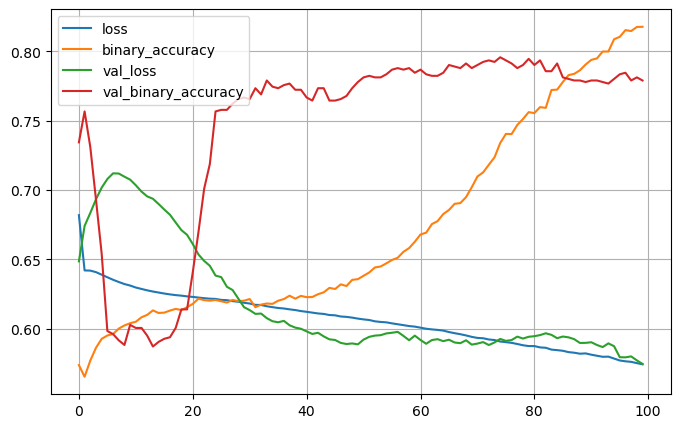

In [58]:
# show plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Using over sampling did not improve the model. What actually happens is the exploding gradient problem. More experiments need to be done, such as changing the activation function or adding drop outs and so on so that the model can work better

Based on what I had done, I decided to use a sequence model to be used in the system

In [59]:
model_seq.trainable=False
model_seq.save('Churn')

INFO:tensorflow:Assets written to: Churn/assets


INFO:tensorflow:Assets written to: Churn/assets


# Model Inference

The first thing to do is prepare the data so that it is ready to be accepted by the model. In preparing the data, you only need to transform it using the final preprocessor. The data that has been prepared can be directly predicted by the model that has been created.

In [60]:
#prepare data
data_inf_final=preprocessor_final.transform(data_inf)

In [61]:
# predict
pred_seq=model_seq.predict(data_inf_final)
pred_func=model_func.predict(data_inf_final)
pred_seq=np.where(pred_seq>0.55,'Yes','No')
pred_func=np.where(pred_func>0.55,'Yes','No')

1/1 [==============================] - 0s 44ms/step


In [62]:
# memasukkan hasil prediksi ke data inference
data_inf['Predict Sequential']=pred_seq
data_inf['Predict Functional']=pred_func
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predict Sequential,Predict Functional
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,Yes,No,One year,No,Electronic check,58.20,1045.25,No,No,No
4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50,No,No,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No,No,No
2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No,...,No,No,Two year,No,Mailed check,20.45,20.45,No,No,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40,No,No,No
4446,6161-UUUTA,Male,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,79.90,260.90,Yes,Yes,Yes
2234,4500-HKANN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,No,Two year,No,Mailed check,59.70,1414.20,No,No,No
5454,2506-TNFCO,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.55,69.55,Yes,Yes,Yes
1278,4730-AWNAU,Male,0,Yes,Yes,36,No,No,DSL,Yes,...,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No,No,No
578,6522-YRBXD,Male,1,Yes,No,35,Yes,Yes,Fiber optic,Yes,...,No,Yes,Month-to-month,Yes,Electronic check,94.55,3365.40,No,No,No


Model Sequential berhasil melakukan prediksi dengan tepat sebanyak 17 dari 20. Model Functional juga memprediksi dengan benar 18 data 

# Kesimpulan

The model created in this case is a model that can predict from the data whether a customer will churn or not. Customer churn has several characteristics, namely that it mostly occurs in customers with short tenure. Apart from that, payment methods also have quite an influence on consumers. Customers with electronic check payment methods are the customers with the most churn. So customers can switch customers to use payment methods that have automatic features. Because with this payment method there is little customer churn. This could be because ease of payment triggers customers to be more loyal. Apart from switching payment methods, marketing can also look for new customers who are used to using payment methods that have automatic payment features. Advertisements that are displayed can also be directed to potential consumers with characters that have an automatic payment model. Another insight obtained is that the longer the contract made with consumers, the smaller the customer churn ratio. Companies can give bigger promotions to consumers who have more contracts for long-term contacts so that consumers are more tempted by long-term contracts.

2 models have been successfully created, namely the sequential model and the `functional` model. Both models are good fit when viewed from the accuracy results and under fit when viewed from the recall score. The performance of the two models is not much different, but the `Functional` model is slightly better when viewed from its accuracy score because it has identical accuracy values. The features chosen to train the model are `MonthlyCharges`, `TotalCharges`, `Contract`, `PaymentMethod`, `InternetService`, `PaperlessBilling`, `TechSupport`